In [ ]:
import os #used to interact with operating system
import tensorflow as tf #tf is popular open source ml framework. used in building ang traiing model even for neural network
import cv2 #used for computer vision tasks, image and video processing
import imghdr#determine the type of image(PNG or JPG)
import matplotlib.pyplot as plt #used create interactive visualization

In [ ]:
! pip install -q kaggle #used to install the Kaggle CLI(command line interface)// q is used to reduce unnessary information

In [ ]:
 from google.colab import files
 files.upload() #from files upload function is called

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"namratha03","key":"1e6fc0b2eadeec09b888930c164598cb"}'}

In [ ]:
! mkdir ~/.kaggle #used to create directory .kaggle in home dir ~

In [ ]:
! cp kaggle.json ~/.kaggle/  #used to copythe file kaggle.json to .kaglle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json #change the permission to read and write to owners providing a level of protection for kaggle API

In [ ]:
!kaggle datasets download -d plameneduardo/sarscov2-ctscan-dataset #used to download a dataset from Kaggle.

 43% 98.0M/230M [00:06<00:06, 22.9MB/s]

In [ ]:
!unzip sarscov2-ctscan-dataset.zip # used to unzip the file

In [ ]:
!mkdir ctscan #used to create directory ctscan in .kaggle of home directory

In [ ]:
!mv COVID ctscan #move COVID files to CTSCAN file

In [ ]:
!mv non-COVID ctscan #move nonCOVID to ctscan ctscan/nonCOVID

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('ctscan') #used to create dataset from the imagefiles stored in the ctscan directory

In [ ]:
data_iterator = data.as_numpy_iterator() #numpy iterator is created.it iterates over elements of dataset as Numpy arrays.each itetration provides batch of data,where each batch is atuple containing numpy arrays representing images and labels

In [ ]:
batch = data_iterator.next() #next method is used to reterive the next batch of the data

In [ ]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

plt.show()

0 :->covid
1 :-> non-covid

2. PreProcess data

In [ ]:
data = data.map(lambda x,y:(x/255,y)) # scaling the pixel values to range [0,1]

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].max() #to find max pixel value

1.0

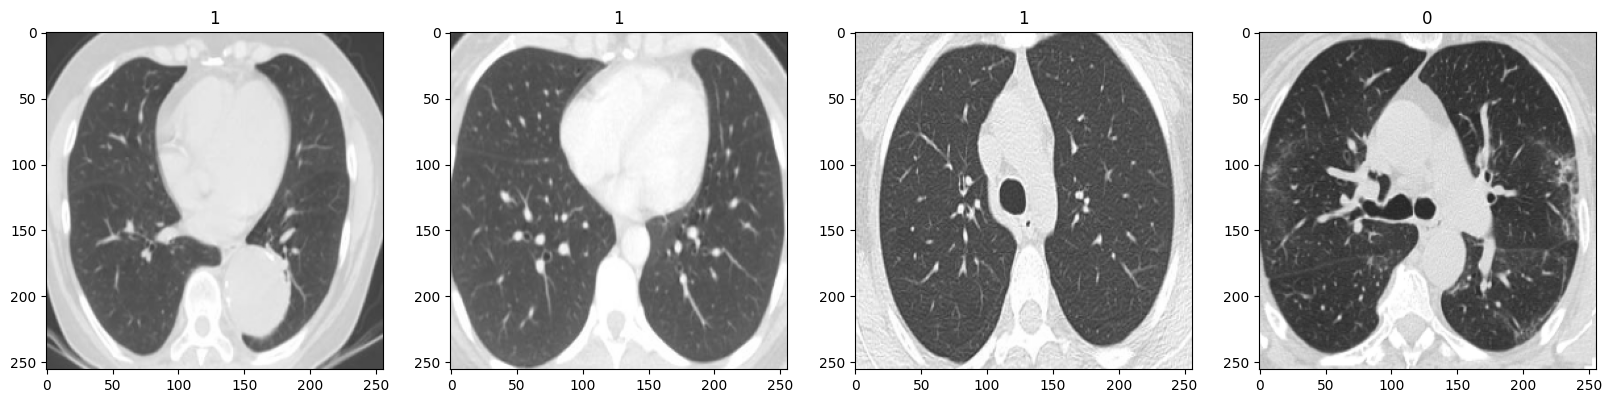

In [ ]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]): #this for loop that itetrates over first 4 images
    ax[idx].imshow(img)#displays current image
    ax[idx].title.set_text(batch[1][idx])#reteives the label of current image

In [ ]:
train_size = int(len(data)*0.7) #to calculate the sizes of training,testing,validation
val_size = int(len(data)*.15) #train=70, val=15 remaining=test
test_size = len(data)-train_size+val_size

print(f"Train size:{train_size}, Val_size:{val_size}, Test_size:{test_size}")

train = data.take(train_size) #this creates nmew dataset
val = data.skip(train_size).take(val_size) #creates new dataset by skipping first train_size
test = data.skip(train_size+val_size).take(test_size)

Train size:54, Val_size:11, Test_size:35


# **build model**

In [ ]:
from tensorflow.keras.models import Sequential #used to bulid cnn
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D #conv2D used in cnn input data,dense=connect neurons to other neurons,flattern=transforms multidimensional array to 1D array,maxpooling=extract important feature and reduce spatial dimension

In [ ]:
model = Sequential() #layers are added sequentially,one o top of the other,it is foundation for building neural network

In [ ]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])#it prepares moel for traing,how loss is cal

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

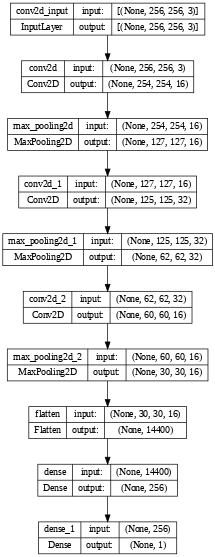

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True, dpi=50)

In [ ]:
log_dir = 'logs'#to store logs generated during the training of neural network

In [ ]:
tensor_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [ ]:
hist = model.fit(train,epochs=15,validation_data=val,callbacks=[tensor_callback]) #this is fit method to train the model on the trai ing dataset for 15 epochswhile monitoring val dataset
#an epoch is one complete pass through the entire training dataset. During each epoch, the model is trained on the entire dataset, and the weights of the model are updated based on the computed gradients.

Epoch 1/15
54/54 [==============================] - 39s 631ms/step - loss: 0.7401 - accuracy: 0.5926 - val_loss: 0.6037 - val_accuracy: 0.6648
Epoch 2/15
54/54 [==============================] - 18s 318ms/step - loss: 0.4853 - accuracy: 0.7731 - val_loss: 0.4318 - val_accuracy: 0.8068
Epoch 3/15
54/54 [==============================] - 16s 283ms/step - loss: 0.4268 - accuracy: 0.7992 - val_loss: 0.4481 - val_accuracy: 0.7614
Epoch 4/15
54/54 [==============================] - 16s 280ms/step - loss: 0.3708 - accuracy: 0.8426 - val_loss: 0.3742 - val_accuracy: 0.8267
Epoch 5/15
54/54 [==============================] - 19s 340ms/step - loss: 0.3058 - accuracy: 0.8623 - val_loss: 0.4476 - val_accuracy: 0.8097
Epoch 6/15
54/54 [==============================] - 18s 312ms/step - loss: 0.2659 - accuracy: 0.8773 - val_loss: 0.2895 - val_accuracy: 0.8778
Epoch 7/15
54/54 [==============================] - 16s 283ms/step - loss: 0.1864 - accuracy: 0.9242 - val_loss: 0.2653 - val_accuracy: 0.8949

In [ ]:
hist.history #retreive training history

{'loss': [0.7400981783866882,
  0.48534128069877625,
  0.42677533626556396,
  0.3708115220069885,
  0.3057815134525299,
  0.2659003436565399,
  0.18637916445732117,
  0.1533498764038086,
  0.11350397020578384,
  0.09618264436721802,
  0.10315895080566406,
  0.06627374142408371,
  0.04799981415271759,
  0.029458437114953995,
  0.01572054997086525],
 'accuracy': [0.5925925970077515,
  0.7731481194496155,
  0.7991898059844971,
  0.8425925970077515,
  0.8622685074806213,
  0.8773148059844971,
  0.9241898059844971,
  0.9363425970077515,
  0.9537037014961243,
  0.9681712985038757,
  0.9589120149612427,
  0.9739583134651184,
  0.9826388955116272,
  0.9907407164573669,
  0.9971064925193787],
 'val_loss': [0.6037399768829346,
  0.4317571818828583,
  0.4480997323989868,
  0.37416258454322815,
  0.4476015269756317,
  0.2895146608352661,
  0.26526814699172974,
  0.25093966722488403,
  0.24387125670909882,
  0.25077515840530396,
  0.33408182859420776,
  0.24544763565063477,
  0.29776933789253235,
 

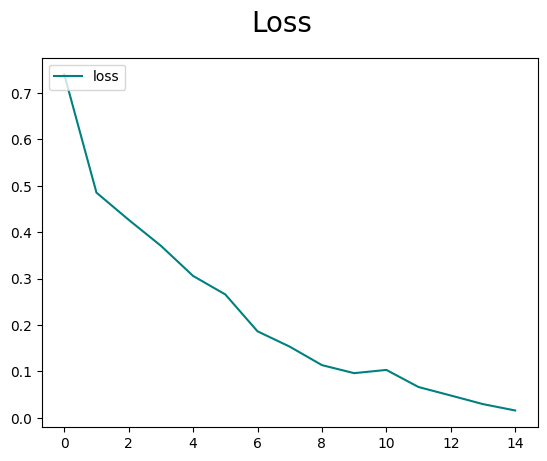

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()  #x axis=epochs y axis= loss

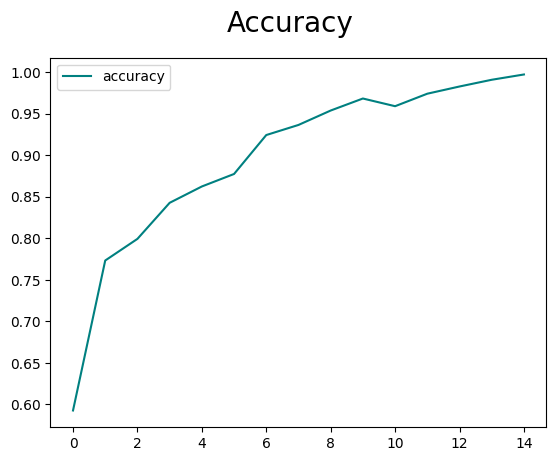

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show() #xaxis=epochs y axis=accuracy

Epoch 1/15
54/54 [==============================] - 18s 308ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.1546 - val_accuracy: 0.9574
Epoch 2/15
54/54 [==============================] - 18s 318ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1277 - val_accuracy: 0.9631
Epoch 3/15
54/54 [==============================] - 14s 253ms/step - loss: 0.0062 - accuracy: 0.9983 - val_loss: 0.1568 - val_accuracy: 0.9432
Epoch 4/15
54/54 [==============================] - 17s 301ms/step - loss: 0.1366 - accuracy: 0.9473 - val_loss: 0.2566 - val_accuracy: 0.9148
Epoch 5/15
54/54 [==============================] - 14s 251ms/step - loss: 0.0421 - accuracy: 0.9890 - val_loss: 0.2925 - val_accuracy: 0.9205
Epoch 6/15
54/54 [==============================] - 18s 310ms/step - loss: 0.0266 - accuracy: 0.9907 - val_loss: 0.2365 - val_accuracy: 0.9403
Epoch 7/15
54/54 [==============================] - 17s 301ms/step - loss: 0.0345 - accuracy: 0.9896 - val_loss: 0.1243 - val_accuracy: 0.9460

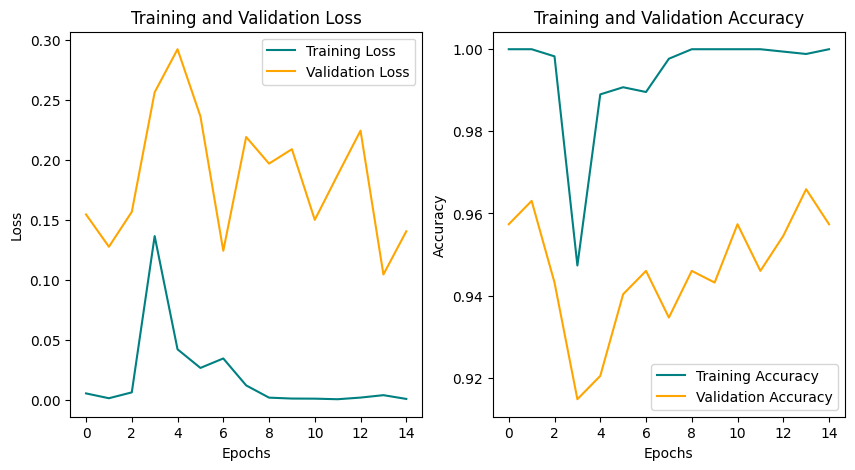

In [ ]:
# Model Training and Evaluation
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensor_callback])

# Visualize Training History (Loss and Accuracy)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plotting Training and Validation Loss
ax1.plot(hist.history['loss'], color='teal', label='Training Loss')
ax1.plot(hist.history['val_loss'], color='orange', label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plotting Training and Validation Accuracy
ax2.plot(hist.history['accuracy'], color='teal', label='Training Accuracy')
ax2.plot(hist.history['val_accuracy'], color='orange', label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show() #training accuracy=Training accuracy provides an indication of how well the model is fitting the training data. High training accuracy means that the model is learning the patterns present in the training dataset.
#validation Accuracy=Validation accuracy provides an estimate of how well the model is expected to perform on new, unseen data. It helps assess the generalization ability of the model. Validation accuracy is crucial for detecting overfitting – a situation where the model performs well on the training data but fails to generalize to new data.


Epoch 1/15
54/54 [==============================] - 14s 250ms/step - loss: 3.4320e-04 - accuracy: 1.0000 - val_loss: 0.1190 - val_accuracy: 0.9688
Epoch 2/15
54/54 [==============================] - 17s 301ms/step - loss: 3.9017e-04 - accuracy: 1.0000 - val_loss: 0.2143 - val_accuracy: 0.9489
Epoch 3/15
54/54 [==============================] - 14s 250ms/step - loss: 4.3156e-04 - accuracy: 1.0000 - val_loss: 0.1782 - val_accuracy: 0.9517
Epoch 4/15
54/54 [==============================] - 15s 253ms/step - loss: 1.8419e-04 - accuracy: 1.0000 - val_loss: 0.2087 - val_accuracy: 0.9602
Epoch 5/15
54/54 [==============================] - 17s 301ms/step - loss: 1.6649e-04 - accuracy: 1.0000 - val_loss: 0.1581 - val_accuracy: 0.9631
Epoch 6/15
54/54 [==============================] - 14s 246ms/step - loss: 1.2981e-04 - accuracy: 1.0000 - val_loss: 0.2204 - val_accuracy: 0.9460
Epoch 7/15
54/54 [==============================] - 18s 316ms/step - loss: 1.2576e-04 - accuracy: 1.0000 - val_loss: 0

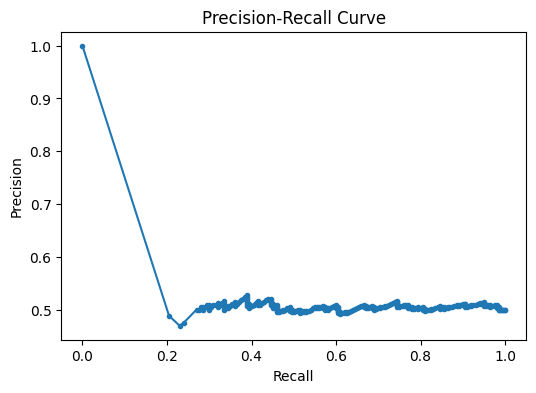

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Model Training and Evaluation
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensor_callback])
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

fig, ax = plt.subplots(figsize=(6, 4))
y_pred = model.predict(test)

# Visualize Precision-Recall Curve
y_true = np.concatenate([y for x, y in test], axis=0)  # Extract true labels from the test set
precision, recall, _ = precision_recall_curve(y_true, y_pred)
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show() #The Precision-Recall curve is useful for evaluating binary classification models, especially when dealing with imbalanced datasets.
#Precision is a measure of the accuracy of the positive predictions made by a model.
# TP / (TP + FP)
#Recall is a measure of the ability of a model to capture all the relevant instances of a positive class.
#TP / (TP + FN)

# **4. Evaluate model performance**

In [ ]:
from tensorflow.keras.metrics import Recall, Precision,BinaryAccuracy #Binary Accuracy=
#Total Number of Predictions/Number of Correct Predictions
​


In [ ]:
pre = Precision()#Precision measures the accuracy of positive predictions made by a binary classification model. It is the ratio of true positives to the sum of true positives and false positives
re = Recall() #Recall, also known as True Positive Rate or Sensitivity, measures the ability of a binary classification model to identify all relevant instances from the positive class.
acc = BinaryAccuracy()#creating instance of three diffrent metrics

In [ ]:
#iterating through batches of the test dataset
# using test.as_numpy_iterator() and making predictions with your
# model. After each batch, you are updating the states of the Precision, Recall, and BinaryAccuracy metrics
# using the update_state method.
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 85ms/step


In [ ]:
import numpy as np
y_pred=np.array([])
y_true=np.array([])
y_pred=np.append(y_pred,1 if yhat[0][0]>0.5 else 0)
y_true=np.append(y_true,y)#manually aggregating predictions (y_pred) and true labels (y_true) by
# appending values based on a threshold condition

In [ ]:
print(f'Precision : {pre.result().numpy()} ,Recall :{re.result().numpy()} ,Accuracy : {acc.result().numpy()}')

Precision : 0.9226804375648499 ,Recall :0.9179487228393555 ,Accuracy : 0.9226932525634766


# **Testing**

In [ ]:
import os
img = cv2.imread('/content/ctscan/non-COVID/Non-Covid (1).png')
resize = tf.image.resize(img,(256,256))
yhat = model.predict(np.expand_dims(resize/255,0))
print(f"Predicted class is {'non-covid' if round(yhat[0][0]) > 0.5 else 'covid'}")


1/1 [==============================] - 0s 188ms/step
Predicted class is non-covid


In [ ]:
model.save('model.keras')

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('model.keras')
def calculate(imgpath):
  img = cv2.imread(imgpath)
  resize = tf.image.resize(img,(256,256))
  yhat = model.predict(np.expand_dims(resize/255,0))#Preprocesses the resized image (normalizes pixel values to the range [0, 1]) and makes a prediction using the trained model.
  return not round(yhat[0][0]) > 0.5#Determines the predicted class based on a threshold condition. If the predicted probability is greater than 0.5, it's classified as 'non-covid'; otherwise, it's classified as 'covid'.

#OpenCV (cv2) to read an image, resizing it using TensorFlow's tf.image.resize, and then making a prediction using your trained model


In [ ]:
calculate('/content/ctscan/non-COVID/Non-Covid (1).png')
#use the saved model to make predictions on a new image. To achieve this, you can follow these steps:

#Load the saved model.
#Preprocess the input image.
#Use the loaded model to make predictions on the preprocessed image.

1/1 [==============================] - 0s 74ms/step


False

In [ ]:
!pip install -q streamlit
#Streamlit is an open-source Python library that simplifies the
# process of creating web applications for data science and
#machine learning. It is designed to make it easy for data scientists
# and engineers to turn data scripts into shareable web apps with minimal effort.
# Streamlit enables you to create interactive and visually appealing applications without extensive knowledge of web development.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.2 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import os
import io
import PIL.Image as Image
from tensorflow.keras.models import load_model
import cv2
import tensorflow as tf
import numpy as np


def calculator(imgpath):
        model=load_model('model.keras')
        img = cv2.imread(imgpath)
        resize = tf.image.resize(img,(256,256))
        yhat = model.predict(np.expand_dims(resize/255,0))
        return not round(yhat[0][0]) > 0.5


st.title('Covid Detection using CNN')
uploaded_file = st.file_uploader("Choose a image file")

if uploaded_file is not None:
  byte_io = io.BytesIO(uploaded_file.getvalue())
  image = Image.open(byte_io)
  image.save('image.png')
  ans=calculator('image.png')
  st.write('Covid' if ans else 'Non Covid')
  st.image('image.png',caption='Covid' if ans else 'Non Covid')

Writing app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com
 #command is used to retrieve the public IPv4 address of your machine or the machine where the code is executed
 #icanhazip.com is a service that provides your public IP address.

35.189.173.139


In [ ]:
!streamlit run /content/app.py &>/content/logs.txt & npx localtunnel --port 8501
#combination of commands to run a Streamlit app (app.py) and expose it using a public URL via npx localtunnel

npx: installed 22 in 3.144s
your url is: https://sour-worlds-give.loca.lt


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelBinarizer

# Initialize variables to store true labels and predicted labels
true_labels_list = []
predicted_labels_list = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)

    # Update states for precision, recall, and accuracy
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

    # Convert raw predictions to class labels with a threshold of 0.5
    predicted_labels = (yhat > 0.5).astype(int)

    # Append true and predicted labels to the lists
    true_labels_list.extend(y)
    predicted_labels_list.extend(predicted_labels)

# Calculate confusion matrix
cm = confusion_matrix(true_labels_list, predicted_labels_list)
print("Confusion Matrix:")
print(cm)

# Label Encoding (if needed)
# label_binarizer = LabelBinarizer()
# true_labels_bin = label_binarizer.fit_transform(true_labels_list)

# Plotting Confusion Matrix
names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
labels = np.asarray(labels).reshape(2, 2)

ticklabels = ['covid', 'non_covid']
sns.set(font_scale=0.7)
plt.figure(figsize=(5, 4))
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels, annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.xlabel("Predicted", size=20)
plt.ylabel("Actual", size=20)
plt.savefig('cm.png', transparent=True)
plt.show()


In [ ]:
# Calculate precision, recall, and F1 score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
precision = precision_score(true_labels_list, predicted_labels_list)
recall = recall_score(true_labels_list, predicted_labels_list)
f1 = f1_score(true_labels_list, predicted_labels_list)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


In [ ]:
from sklearn.metrics import classification_report
classification_report = classification_report(true_labels_list, predicted_labels_list)
print(classification_report)